In [25]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [26]:
wine=load_wine()
f=pd.DataFrame(wine.data,columns=wine.feature_names)
t=pd.DataFrame(wine.target,columns=['target'])


In [27]:
data=pd.concat([f,t],axis=1)

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(f,t,test_size=0.3)

In [47]:
#using two features alcohol and hue

x=xtrain[['alcohol','hue']]
y=ytrain['target']
data=pd.concat([x,y],axis=1)
data

xtest = xtest[['alcohol','hue']]
ytest= ytest['target']
test = pd.concat([xtest,ytest],axis=1)
test = np.array(test)


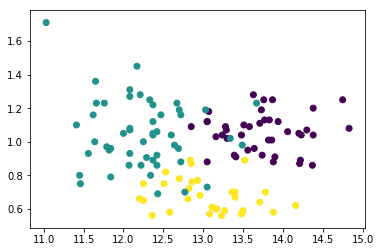

In [48]:
plt.scatter(x['alcohol'],x['hue'],c=y)

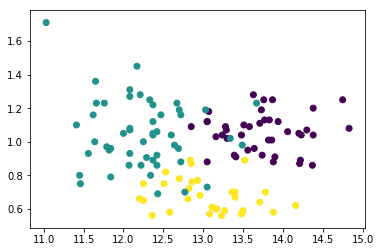

In [49]:
#for selction by position
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y)

In [58]:
x_train=np.array(x)
y_train=np.array(y)
d=np.array(data)
d

array([[12.86 ,  0.76 ,  2.   ],
       [12.67 ,  1.23 ,  1.   ],
       [11.84 ,  0.96 ,  1.   ],
       [12.69 ,  0.96 ,  1.   ],
       [12.37 ,  1.12 ,  1.   ],
       [12.84 ,  0.89 ,  2.   ],
       [13.05 ,  0.88 ,  0.   ],
       [13.41 ,  0.91 ,  0.   ],
       [13.29 ,  1.07 ,  0.   ],
       [13.56 ,  0.95 ,  0.   ],
       [12.42 ,  0.92 ,  1.   ],
       [13.9  ,  0.91 ,  0.   ],
       [11.41 ,  1.1  ,  1.   ],
       [12.37 ,  1.05 ,  1.   ],
       [12.43 ,  0.69 ,  1.   ],
       [11.65 ,  1.36 ,  1.   ],
       [13.3  ,  1.02 ,  0.   ],
       [11.66 ,  1.23 ,  1.   ],
       [11.64 ,  1.   ,  1.   ],
       [14.21 ,  0.87 ,  0.   ],
       [13.16 ,  0.6  ,  2.   ],
       [12.22 ,  0.86 ,  1.   ],
       [12.37 ,  1.04 ,  1.   ],
       [14.2  ,  1.05 ,  0.   ],
       [12.85 ,  0.87 ,  2.   ],
       [13.87 ,  1.25 ,  0.   ],
       [12.2  ,  0.66 ,  2.   ],
       [12.25 ,  0.75 ,  2.   ],
       [13.73 ,  1.19 ,  0.   ],
       [12.64 ,  0.98 ,  1.   ],
       [13

In [51]:
#function to get distances from the input point to all the other points in the graph returns a list small distance cantaning the distance and the class of wine
#d is a lists of lists contaning x,y,class of wine of all the points
def get_distance(d,x,y):
    small_dist=[]
    for a,b,c in d:
        dist=np.sqrt(np.power((x-a),2)+np.power((y-b),2))
        small_dist.append([dist,int(c)])
    return small_dist

In [81]:
#q,p are the input points
q,p,yt = test[7]
s=get_distance(d,q,p)


In [82]:
print(s)

[[0.651920240520265, 2], [0.30265491900843183, 1], [0.577754273026171, 1], [0.3940812099047608, 1], [0.06999999999999984, 1], [0.5575840743780265, 2], [0.7473285756613365, 0], [1.0770329614269016, 0], [0.9277930803794561, 0], [1.2139604606411212, 0], [0.27459060435491967, 1], [1.5554099138169344, 0], [0.9642095207992909, 1], [0.1399999999999999, 1], [0.5035871324805669, 1], [0.7397972695272661, 1], [0.9454099639838808, 0], [0.7111258679024401, 1], [0.7543208866258431, 1], [1.8676188047886018, 0], [0.9860020283954802, 2], [0.36249137920783653, 1], [0.1499999999999999, 1], [1.8353473785635244, 0], [0.5768882040742386, 2], [1.5011995203836164, 0], [0.5565968020030297, 2], [0.45607017003965494, 2], [1.3600000000000012, 0], [0.3420526275297424, 1], [1.214125199474915, 0], [1.153819743287487, 2], [0.9992497185388644, 1], [1.2632101962856395, 0], [0.8060397012554663, 0], [1.6285576440519398, 2], [0.3008321791298257, 1], [0.3894868418830082, 1], [0.8507055894961534, 1], [0.49030602688525093, 0

In [83]:
#to find the nearest neighbours we sort the list s and pick out the first n part of the list
def get_neighbour(s,n):
    np.sort(s,axis=0)
    neighbour=s[0:n]
    return neighbour

In [99]:
g = get_neighbour(s,11)
g

[[0.651920240520265, 2],
 [0.30265491900843183, 1],
 [0.577754273026171, 1],
 [0.3940812099047608, 1],
 [0.06999999999999984, 1],
 [0.5575840743780265, 2],
 [0.7473285756613365, 0],
 [1.0770329614269016, 0],
 [0.9277930803794561, 0],
 [1.2139604606411212, 0],
 [0.27459060435491967, 1]]

In [100]:
#from g, the selected part of the sorted elements we calculate the number of class types present
def prediction(g):
    zero=0
    one=0
    two=0
    mymax={}
    for dis,cl in g:
        if cl==1:
            one+=1
            
        elif cl==0:
            zero+=1
            
        else:
            two+=1
    mymax[one]='wine one'
    mymax[zero]='wine zero'
    mymax[two]='wine two'
    return mymax
    
    

            
    

In [101]:
maxi={}
maxi=prediction(g)
pridict=max(maxi.keys())
print(maxi[pridict])


wine one
